# Table of Contents

- [1. Introduction](#1.-Introduction)
- [2. Data Overview](#32.-Data-Overview)
    - [2.1 Initial Analysis](#2.1-Initial-Analysis)
- [3. Data Cleansing](#3.-Data-Cleansing)
- [4. Data Analysis - Which is the most preferred Star Wars Movies?](#4.-Data-Analysis---Which-is-the-most-preferred-Star-Wars-Movies?)
    - [4.1 Methodology](#4.1-Methodology-1)
    - [4.2 Conclusion](#4.2-Conclusion-1)
- [5. Data Analysis - Which is the most watched star war movie?](#5.-Data-Analysis---Which-is-the-most-watched-star-war-movie?)
    - [5.1 Methodology](#5.1-Methodology-2)
    - [5.2 Conclusion](#5.2-Conclusion-2)
- [6. Data Analysis - Nice to know that you are a star wars fan! Are you also a Star Trek fan or an Expanded Universe Fan?](#6.-Data-Analysis---Nice-to-know-that-you-are-a-star-wars-fan!-Are-you-also-a-Star-Trek-fan-or-an-Expanded-Universe-Fan?)
    - [6.1 Methodology](#6.1-Methodology-3)
    - [6.2 Conclusion](#6.2-Conclusion-3)



# 1. Introduction

While waiting for Star Wars: The Force Awakens to come out, the team at FiveThirtyEight became interested in answering some questions about Star Wars fans. 
In particular, they wondered: **Does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?**

Here's the list of star wars movies with release year: 
- Episode I: The Phantom Menace (1999)
- Episode II: Attack of the Clones (2002)
- Episode III: Revenge of the Sith (2005)
- Episode IV: A New Hope (1977)
- Episode V: The Empire Strikes Back (1980)
- Episode VI: Return of the Jedi (1983)

The team needed to collect data addressing this question. To do this, they surveyed Star Wars fans using the online tool SurveyMonkey. They received 835 total responses, which we can download from [GitHub Repository](https://github.com/dataquestio/solutions/blob/master/Mission201Solution.ipynb)

In this project we will:
1. We will clean and explore the dataset to find the best of the lot - the most preferred movie by the audience accross gender, age and fan base
2. We will find out which is the most watched star wars movie per segments of audience
3. Findout if there is a correlation in fan base of Star wars franchise, Star trek franchise and Expanded universe

## 2. Data Overview

In [1]:
# Importing relevant Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

# Configure matplotlib to display plots
%matplotlib inline


In [2]:
# Read Files and convert to dataframe
star_wars = pd.read_csv("starWars.csv", encoding="ISO-8859-1")
pd.options.display.max_columns = 99 # Maximize number of columns displayed
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return 

In [3]:
# Further Analysising Dataset
star_wars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1187 entries, 0 to 1186
Data columns (total 38 columns):
 #   Column                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                         --------------  -----  
 0   RespondentID                                                                                                                                   1186 non-null   float64
 1   Have you seen any of the 6 films in the Star Wars franchise?                                                                                   1187 non-null   object 
 2   Do you consider yourself to be a fan of the Star Wars film franchise?                                                                          837 non-null    object 
 3   Which of the following Star 

In [4]:
#Display list of column names
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

## 2.1 Initial Analysis

1. Except Respondent ID all other columns have String object class
2. Dataset has 1187 rows and 38 columns. We can remove columns which is not necessary for our analysis
3. Some Column have very long names. We might face difficult while applying functions/methods 
4. Values in index 0 are extension of the questions - values are either 'response' or super hero or movie names
5. Few columns which can be useful for analysis has string Yes/No values
6. Columns with questions ' Which of the following Star Wars films have you seen?' have values in form of full movies names
7. Columns ranking star wars movies has string datatype


   
    

# 3. Data Cleansing

1. We will remove columns which are not necessary for our analysis
2. We will rename a few columns for better comprenhensibility
3. Index 0 will be merged with columns after renaming of columns
4. 4We will convert Yes/No columns to boolean values for better analysis
5. Columns with full movie names will be converted to columns with boolean values
6. Columns ranking star wars movies will be conveted to float

In [5]:
# Remove columns we will not need in our analysis

star_wars = star_wars.drop(star_wars.columns[15:31], axis = 1)

In [6]:
# Rename column names for better comprehensibility

column_newnames = { 'RespondentID' : 'RespondentID' ,
       'Have you seen any of the 6 films in the Star Wars franchise?' : 'seen_starwars',
       'Do you consider yourself to be a fan of the Star Wars film franchise?' : 'starwars_fan',
       'Which of the following Star Wars films have you seen? Please select all that apply.' : 'Seen_1',
       'Unnamed: 4' : 'Seen_2', 
        'Unnamed: 5' : 'Seen_3' , 
        'Unnamed: 6': 'Seen_4', 
        'Unnamed: 7' : 'Seen_5', 
        'Unnamed: 8': 'Seen_6',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.': 'Pref_movie1',
       'Unnamed: 10' : 'Pref_movie2',
        'Unnamed: 11': 'Pref_movie3', 
        'Unnamed: 12': 'Pref_movie4', 
        'Unnamed: 13': 'Pref_movie5',
       'Unnamed: 14': 'Pref_movie6',
       'Do you consider yourself to be a fan of the Expanded Universe?æ' : 'expanded_universe_fan',
       'Do you consider yourself to be a fan of the Star Trek franchise?' : 'Star_trek_fan',
       'Gender': 'Gender', 'Age' : 'Age', 'Household Income': 'Household Income', 'Education': 'Education', 
       'Location (Census Region)': 'Location (Census Region)'}

star_wars = star_wars.rename( column_newnames, axis = 1)




In [7]:
# Remove index 0 as the values are extension of questions

star_wars.drop([0], inplace = True)

In [8]:
# Convert Yes/No values to boolean values

# Defining function to convert Yes/No values to True/False/Nan

def yes_no(value):
    if value == 'Yes':
        return True
    elif value == 'No':
        return False
    else:
        return np.nan

# Convert columns which can be used for analysis to Boolean values

star_wars['seen_starwars'] = star_wars['seen_starwars'].map(yes_no)
star_wars['starwars_fan'] = star_wars['starwars_fan'].map(yes_no)

star_wars['expanded_universe_fan'] = star_wars['expanded_universe_fan'].map(yes_no)
star_wars['Star_trek_fan'] = star_wars['Star_trek_fan'].map(yes_no)

star_wars['Seen_1'] = star_wars['Seen_1'].apply( lambda x: True if x == "Star Wars: Episode I  The Phantom Menace" else False)
star_wars['Seen_2'] = star_wars['Seen_2'].apply( lambda x: True if x == "Star Wars: Episode II  Attack of the Clones" else False)
star_wars['Seen_3'] = star_wars['Seen_3'].apply( lambda x: True if x == "Star Wars: Episode III  Revenge of the Sith" else False)
star_wars['Seen_4'] = star_wars['Seen_4'].apply( lambda x: True if x == "Star Wars: Episode IV  A New Hope" else False)
star_wars['Seen_5'] = star_wars['Seen_5'].apply( lambda x: True if x == "Star Wars: Episode V The Empire Strikes Back" else False)
star_wars['Seen_6'] = star_wars['Seen_6'].apply( lambda x: True if x == "Star Wars: Episode VI Return of the Jedi" else False)




In [9]:
# Convert datatype of preference movie columns to float
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)
star_wars.head()

,RespondentID,seen_starwars,starwars_fan,Seen_1,Seen_2,Seen_3,Seen_4,Seen_5,Seen_6,Pref_movie1,Pref_movie2,Pref_movie3,Pref_movie4,Pref_movie5,Pref_movie6,expanded_universe_fan,Star_trek_fan,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,2.0,1.0,4.0,5.0,6.0,False,False,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1.0,2.0,3.0,4.0,5.0,6.0,NaN,False,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5.0,6.0,1.0,2.0,4.0,3.0,NaN,True,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5.0,4.0,6.0,2.0,1.0,3.0,False,False,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


# 4. Data Analysis - Which is the most preferred Star Wars Movies?

## 4.1 Methodology

We will try to answer above question by segmenting the response as per below audience group:
- Star Wars Movie preference of Star Wars Fans vs Star Wars Non-Fans
- Star Wars Movie preference per Gender
- Star Wars Movie preference per Age group

We will calculate mean of movie rakings for respective groups and then derive preference by ranking the means in descending order.

Below is example of how final preference is derived for Fan dataset:

| Movie | Mean | Ranking |
|:-----:|:----:|:-------:|
|EP1| 2.94| 5.0|
|EP2| 3.60| 6.0|
|EP3| 4.20| 1.0|
|EP4| 3.94| 2.0|
|EP5| 2.86| 6.0|
|EP6| 3.47| 4.0

Finally the calculated prerefence score will be used to create grouped bar charts for comparitive analysis




In [10]:
# Group Fans and non-fans dataset and calculate mean of the rankings 

Pref_cols = ['Pref_movie1', 'Pref_movie2', 'Pref_movie3', 'Pref_movie4', 'Pref_movie5', 'Pref_movie6']
Fav_fans = star_wars.groupby('starwars_fan')[Pref_cols].mean()

# Derive preference score by ranking the means in descending order
Fav_fans = Fav_fans.rank(axis = 1, ascending = False)
Fav_fans
# We can ignore NaN values from starwars_fan since respective values of Preference movie columns is also NaN for them

,Pref_movie1,Pref_movie2,Pref_movie3,Pref_movie4,Pref_movie5,Pref_movie6
starwars_fan,,,,,,
False,5.0,3.0,1.0,2.0,6.0,4.0
True,3.0,2.0,1.0,4.0,6.0,5.0


In [11]:
# Derive preference score per Gender 
Fav_gender = star_wars.groupby('Gender')[Pref_cols].mean()
Fav_gender = Fav_gender.rank(axis = 1, ascending = False)
Fav_gender

,Pref_movie1,Pref_movie2,Pref_movie3,Pref_movie4,Pref_movie5,Pref_movie6
Gender,,,,,,
Female,4.0,2.0,1.0,3.0,6.0,5.0
Male,3.0,2.0,1.0,5.0,6.0,4.0


In [12]:
# Derive preference score per age group
Fav_age_data = star_wars.dropna(subset = ['Age'])
Fav_age = Fav_age_data.groupby('Age')[Pref_cols].mean()

# Above result gave us couple of means with same value. 
# To differenciate we will pass parameter method = first so that first value in the dataset will have higher ranking

Fav_age = Fav_age.rank(axis = 1 , method = 'first', ascending = False)
Fav_age


,Pref_movie1,Pref_movie2,Pref_movie3,Pref_movie4,Pref_movie5,Pref_movie6
Age,,,,,,
18-29,1.0,2.0,3.0,5.0,6.0,4.0
30-44,2.0,3.0,1.0,4.0,6.0,5.0
45-60,3.0,2.0,1.0,4.0,6.0,5.0
> 60,5.0,3.0,1.0,2.0,6.0,4.0


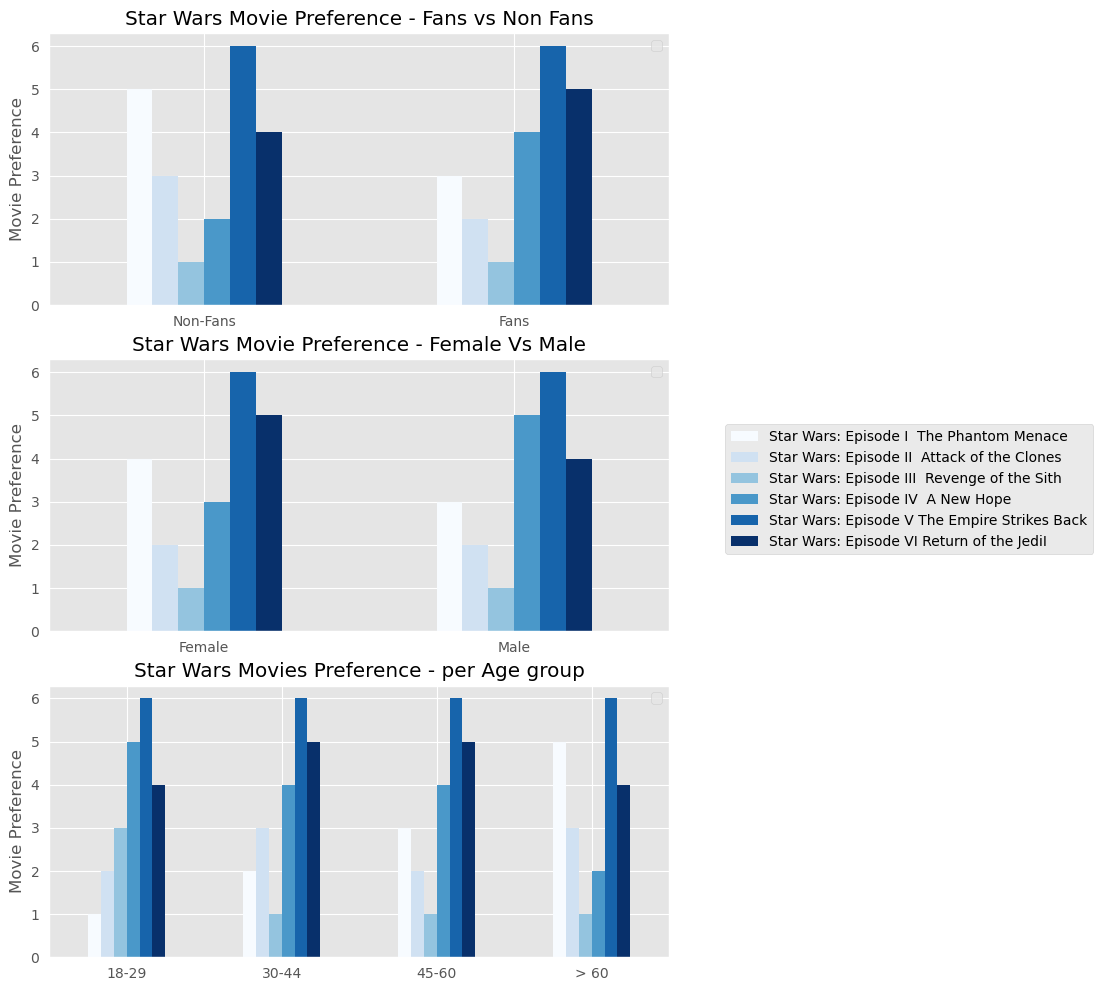

In [13]:
# Create grouped bar charts for Fans/non-fans, Gender and Age dataset calculated above

style.use('ggplot')
fig,axes = plt.subplots(nrows = 3, ncols = 1, figsize = (8,12))

Fav_fans.plot(ax = axes[0], kind = 'bar', colormap = 'Blues')
axes[0].set_xticks(ticks = [False, True],labels = ['Non-Fans','Fans'])
axes[0].set_title('Star Wars Movie Preference - Fans vs Non Fans')

Fav_gender.plot(ax = axes[1], kind = 'bar', colormap = 'Blues')
axes[1].set_title('Star Wars Movie Preference - Female Vs Male')

Fav_age.plot(ax = axes[2], kind = 'bar', colormap = 'Blues')
axes[2].set_title('Star Wars Movies Preference - per Age group')

for i in range(0,3):
    axes[i].tick_params(left = False, bottom = False, labelrotation = 360)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Movie Preference')
    axes[i].legend('')

labels = ['Star Wars: Episode I  The Phantom Menace', 'Star Wars: Episode II  Attack of the Clones',
          'Star Wars: Episode III  Revenge of the Sith', 'Star Wars: Episode IV  A New Hope', 
          'Star Wars: Episode V The Empire Strikes Back', 'Star Wars: Episode VI Return of the JediI']
fig.legend(bbox_to_anchor = (1.2, 0.5), labels = labels, loc = 'center')
plt.show()
                      

## 4.2 Conclusion

We can conclude:

1. "Star Wars: Episode V The Empire Strikes Back" is unambigously the most preferred star war movie. Result holds true for Fans and Non-fans, Male and Female and among all the age group
2. Interestingly for above 60 age group and non-fans group, second preferred star wars movie is Episode I The Phantom Menace
3. Star war Movies IV - VI which were released during 1977 - 1983 were rated higher than their newer counterparts I–III released between 1999 - 2005
   
It is very clear - **The rest of America do realize that “The Empire Strikes Back” is the best star wars movie**



# 5. Data Analysis - Which is the most watched star war movie?

## 5.1 Methodology

To answer above question, we will segment response in seen movies columns again into 3 dataset 
- Fans and Non-Fans
- Gender
- Age

We will perform comparitive analysis via grouped bar charts on the sum of responses of respective seen movie columns

Surely we can perform analysis on other data segments as well, for example Income group, Region and Education level of respondent but this can lead to unnecessary overanalysis of data to reach a simple conclusion

In [14]:
# Sum of responses of seen_movie columns grouped by Fans/Non-Fans, Gender and Age

seen_movies = star_wars.columns[3:9]
seen_fans = star_wars.groupby(['starwars_fan'])[seen_movies].sum()
seen_gender = star_wars.groupby('Gender')[seen_movies].sum()
seen_age = star_wars.groupby('Age')[seen_movies].sum()

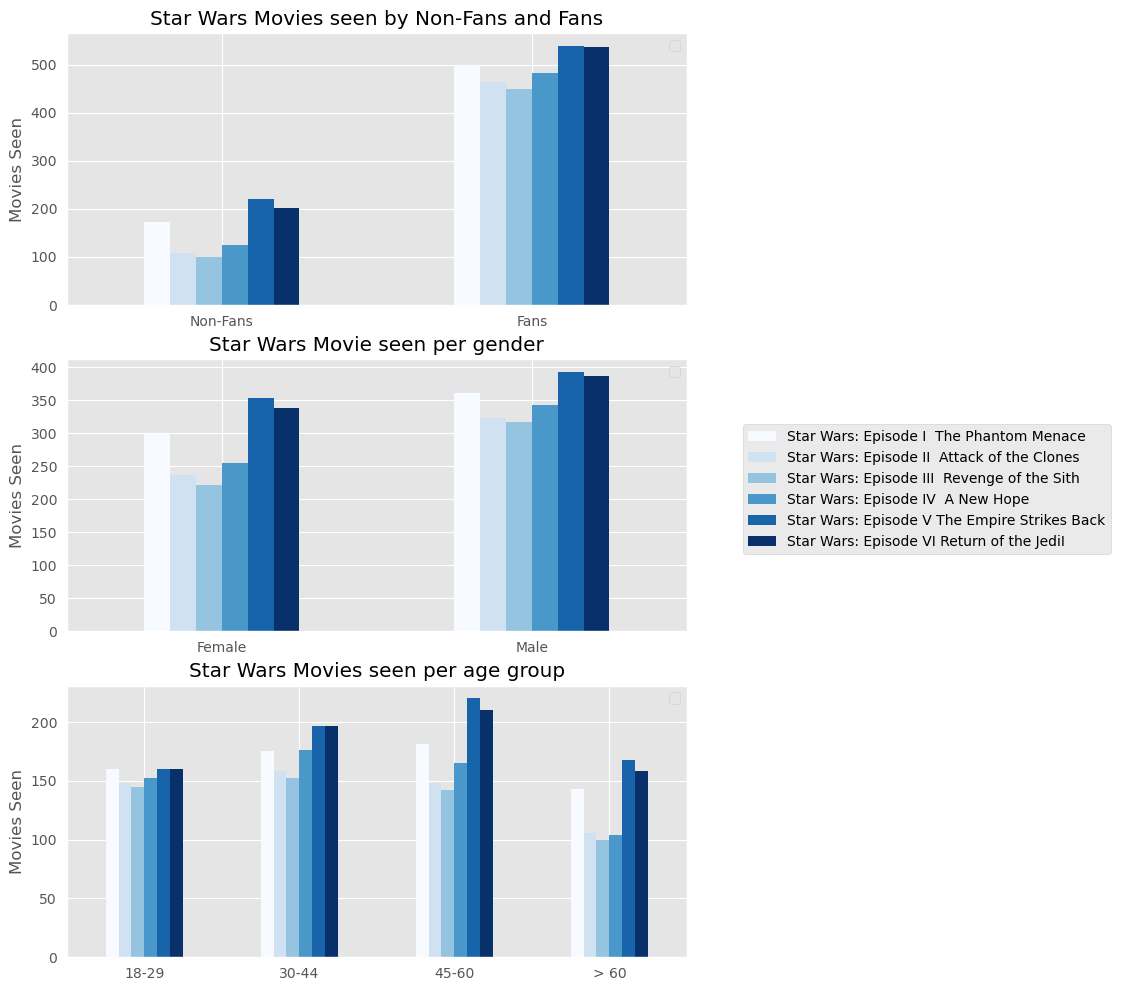

In [15]:
# Plot grouped bar chart for calculated sum of the three groups

fig,axes = plt.subplots(nrows = 3, ncols = 1, figsize = (8,12))

seen_fans.plot(ax = axes[0], kind = 'bar', colormap = 'Blues')
axes[0].set_xticks(ticks = [False, True],labels = ['Non-Fans','Fans'])
axes[0].set_title('Star Wars Movies seen by Non-Fans and Fans')

seen_gender.plot(ax = axes[1], kind = 'bar', colormap = 'Blues')
axes[1].set_title('Star Wars Movie seen per gender')

seen_age.plot(ax = axes[2], kind = 'bar', colormap = 'Blues')
axes[2].set_title('Star Wars Movies seen per age group')

for i in range(0,3):
    axes[i].tick_params(left = False, bottom = False, labelrotation = 360)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Movies Seen')
    axes[i].legend('')

labels = ['Star Wars: Episode I  The Phantom Menace', 'Star Wars: Episode II  Attack of the Clones',
          'Star Wars: Episode III  Revenge of the Sith', 'Star Wars: Episode IV  A New Hope', 
          'Star Wars: Episode V The Empire Strikes Back', 'Star Wars: Episode VI Return of the JediI']
fig.legend(bbox_to_anchor = (1.2, 0.5), labels = labels, loc = 'center')
plt.show()

## 5.2 Conclusion

Ee can conclude:

1. "Star Wars: Episode V The Empire Strikes Back" is the most watched star wars movie. It was a hit among Fans & Non-Fans, across Gender group and among all genders. No wonder it is so highly rated
2. Original star wars trilogy (IV - VI) were watched significantly more then newer counterparts


# 6. Data Analysis - Nice to know that you are a star wars fan! Are you also a Star Trek fan or an Expanded Universe Fan?

## 6.1 Methodology

To answer above question we will need to calculate **Pearson's Correlation Coefficient** or **Pearson's r** between responses registered in questions asking if respondent is fan of any of the franchise.

Pearson's r values lie between -1.00 and +1.00. When the positive correlation is perfect, the Pearson's r is equal to +1.00. When the negative correlation is perfect, the Pearson's r is equal to-1.00. A value of 0.0 shows no correlation. The sign of the Pearson's r only gives us the direction of the correlation.

After calculating, we will view correlations values from full population as well as Male & Female separately via Heatmap

In [16]:

fans_cols = ['starwars_fan', 'expanded_universe_fan', 'Star_trek_fan'] # Group relevant columns

# Calculate correlation for full population
corr_data = star_wars[fans_cols].corr()

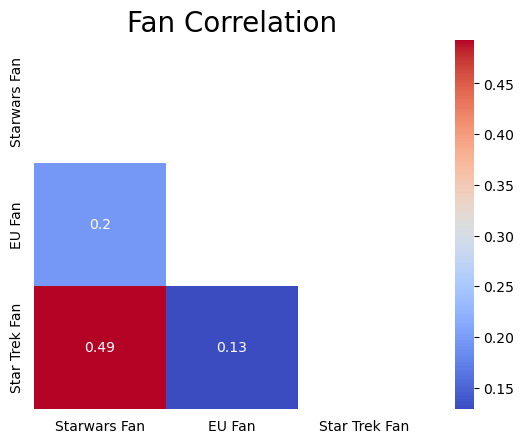

In [17]:
# Create heatmap of correlation values for full population

style.use('default')

mask = np.triu(np.ones_like(corr_data, dtype=bool)) 
# Info in lower triangle of heatmap will be same as upper. Defining mask will ensure only one of the triangles (lower in this case) will be visible in the result. 
# Reference: https://www.geeksforgeeks.org/data-visualization/plotting-only-the-upperlower-triangle-of-a-heatmap-in-matplotlib/ 

labels = ['Starwars Fan', 'EU Fan', 'Star Trek Fan']
sns.heatmap(corr_data, mask = mask, cmap='coolwarm', annot = True, xticklabels = labels , 
            yticklabels = labels )
plt.tick_params(left = False, bottom = False)
plt.title('Fan Correlation', fontsize = 20)
plt.show()


In [18]:
# Calculate correlation for female and male separately 
female_fan = star_wars[star_wars['Gender']== 'Female'][fans_cols].corr()
male_fan = star_wars[star_wars['Gender']== 'Male'][fans_cols].corr()

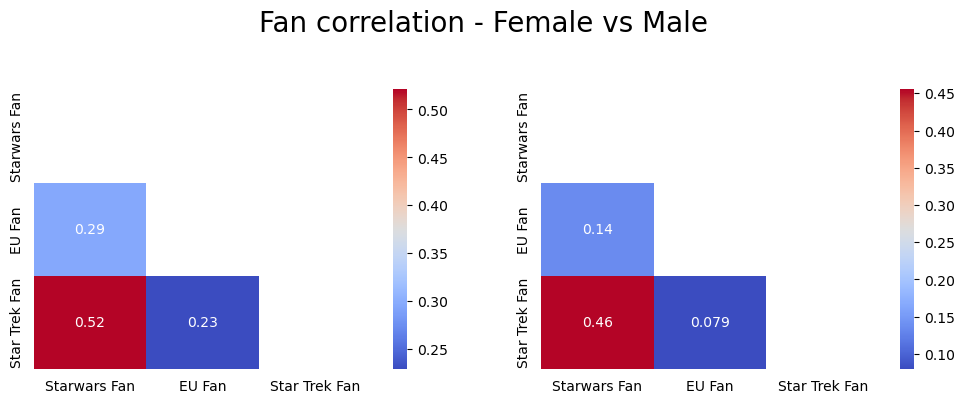

In [19]:
#Create separate heatmap for female and male respondent
corr_data_gender = [female_fan, male_fan]
fig = plt.figure(figsize = (12,8))
labels = ['Starwars Fan', 'EU Fan', 'Star Trek Fan']

for i,data in zip(range(1,3),corr_data_gender):
    plt.subplot(2,2,i)
    mask = np.triu(np.ones_like(data, dtype=bool))
    sns.heatmap(data, mask = mask, cmap='coolwarm', annot = True, xticklabels = labels, yticklabels = labels)
    plt.tick_params(left = False, bottom = False)

fig.suptitle('Fan correlation - Female vs Male', fontsize = 20) # Reference https://www.geeksforgeeks.org/python/how-to-set-a-single-main-title-for-all-the-subplots-in-matplotlib/

plt.show()

## 6.2 Conclusion

With above analysis we can conclude:
1. Star wars and Star trek fan base are somewhat positively correlated (+0.49). In other words, if a person is a fan of star wars franchise chances are the person will also be fan of star trek franchise
2. Star wars and star trek fan correlation is higher for female population compared to male population
3. There is very low correlation between Expanded Universe and star wars fanbase and apparantly 0 correlation between Star trek and Expanded Universe fans in male population